In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pysentani import *
import sentani as sti
survey = find_survey("../data-anonymous")

../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx


In [3]:
survey['access_type'] = survey['village_name'].apply(lambda x: sti.access_map.get(x))

In [51]:
frequency = {'PLN_expenditure':'monthly',
'community_microgrid_expenditure':'monthly',
'genset_expenditure':'daily'}

multiplier = {'monthly':1, 'weekly':4, 'daily':30}

# create new columns with same monthly frequency
for column in frequency.keys():
    # adjust expenditure frequency
    expenditure = survey[column] * multiplier[frequency[column]]
    new_column = column + '_monthly'
    survey[new_column] = expenditure



pd.set_option('max_rows', 200)
survey.groupby(['access_type', ])[['PLN_expenditure_monthly',]].agg(['sum','count'])

PLN_expenditure_monthly      
                                        sum count
access_type                                      
PLN_grid                           73244830   453
PLN_microgrid                           NaN     0
community_microgrid                   34000     1
no_access                               NaN     0

In [52]:
#monthly expenditure divided by 960 rp per kWh (.08 USD per kWh * 12000 rp to USD exchange)
def PLN_kwh_conversion(df):
    converted = (df['PLN_expenditure_monthly']/(960))
    return converted

survey['PLN_kWh'] = survey.apply(PLN_kwh_conversion, axis=1)

# kWh multiplied by Lawrence Berkely Labratory estimation of 1100 g CO2 per kWh
def CO2_emission(df1):
    converted = df1['PLN_kWh']*1100 
    return converted

survey['CO2_g'] = survey.apply(CO2_emission, axis=1)

# Potential Photovoltaic carbon emissions (g CO2 per kWh), (if genset replaced by PV)
def PV_emission(df2):
    converted = df2['PLN_kWh']*100
    return converted
survey['PV_emission'] = survey.apply(PV_emission, axis=1)

# CO2 reduction (co2(g) column - PV_emission column)

def CO2_reduction(df3):
    converted = df3['CO2_g']-survey['PV_emission']
    return converted
survey['CO2_reduction'] = survey.apply(CO2_reduction, axis=1)

In [53]:
df = survey.groupby(['access_type',
                'village_name'])[['PLN_expenditure_monthly',
                                  'PLN_kWh','CO2_g','PV_emission','CO2_reduction']].agg(['sum'])


In [54]:
df

PLN_expenditure_monthly       PLN_kWh  \
                                                     sum           sum   
access_type         village_name                                         
PLN_grid            Ajau                          710000    739.583333   
                    Asei                         2925000   3046.875000   
                    Babrongko                        NaN           NaN   
                    Burawai                       650000    677.083333   
                    Evale                        2069000   2155.208333   
                    Flafow                       7780000   8104.166667   
                    Hobong                       2183000   2273.958333   
                    Khamayakha                   6500000   6770.833333   
                    Kheleubulow                 30953000  32242.708333   
                    Kwadeware                    2720000   2833.333333   
                    Pantai_Yahim                  755000    786.458333   
                    Simporo                          NaN           NaN   
                    Sosiri                       6033830   6285.239583   
                    Yakonde                      3490000   3635.416667   
                    Yobeh                        3874000   4035.416667   
                    Yoka                         2602000   2710.416667   
PLN_microgrid       Ayapo                            NaN           NaN   
                    Donday                           NaN           NaN   
community_microgrid Atamali                          NaN           NaN   
                    Kensio                         34000     35.416667   
no_access           Abar                             NaN           NaN   
                    Ebunfauw                         NaN           NaN   
                    Kalio                            NaN           NaN   
                    Kampung_Baru                     NaN           NaN   
                    Khageuw                          NaN           NaN   
                    Obolyo                           NaN           NaN   
                    Puai                             NaN           NaN   
                    Yoboi                            NaN           NaN   
                    Yokiwa                           NaN           NaN   

                                            CO2_g     PV_emission  \
                                              sum             sum   
access_type         village_name                                    
PLN_grid            Ajau            813541.666667    73958.333333   
                    Asei           3351562.500000   304687.500000   
                    Babrongko                 NaN             NaN   
                    Burawai         744791.666667    67708.333333   
                    Evale          2370729.166667   215520.833333   
                    Flafow         8914583.333333   810416.666667   
                    Hobong         2501354.166667   227395.833333   
                    Khamayakha     7447916.666667   677083.333333   
                    Kheleubulow   35466979.166667  3224270.833333   
                    Kwadeware      3116666.666667   283333.333333   
                    Pantai_Yahim    865104.166667    78645.833333   
                    Simporo                   NaN             NaN   
                    Sosiri         6913763.541667   628523.958333   
                    Yakonde        3998958.333333   363541.666667   
                    Yobeh          4438958.333333   403541.666667   
                    Yoka           2981458.333333   271041.666667   
PLN_microgrid       Ayapo                     NaN             NaN   
                    Donday                    NaN             NaN   
community_microgrid Atamali                   NaN             NaN   
                    Kensio           38958.333333     3541.666667   
no_access           Abar                      NaN             NaN   
        

In [56]:
df.reset_index(inplace=True)

In [57]:
df.head()

,index,access_type,village_name,PLN_expenditure_monthly,PLN_kWh,CO2_g,PV_emission,CO2_reduction
,,,,sum,sum,sum,sum,sum
0,0,PLN_grid,Ajau,710000,739.583333,813541.666667,73958.333333,NaN
1,1,PLN_grid,Asei,2925000,3046.875000,3351562.500000,304687.500000,NaN
2,2,PLN_grid,Babrongko,NaN,NaN,NaN,NaN,NaN
3,3,PLN_grid,Burawai,650000,677.083333,744791.666667,67708.333333,NaN
4,4,PLN_grid,Evale,2069000,2155.208333,2370729.166667,215520.833333,NaN


In [46]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]

In [58]:
df.columns = ['access_type', 'vn', 'PLN_sum', 'PLN_kwh_sum', 'CO2','PV','red']

ValueError: Length mismatch: Expected axis has 8 elements, new values have 7 elements

KeyError: "['vn' 'CO2'] not in index"

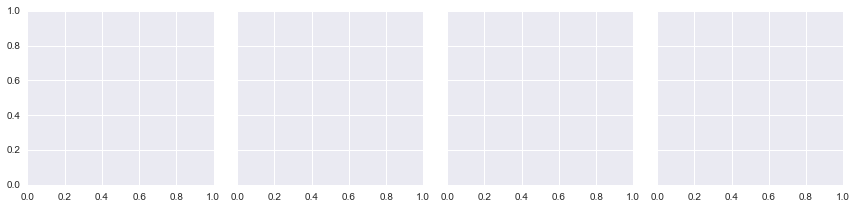

In [59]:
g = sns.FacetGrid(col="access_type", data=df)
g = (g.map(sns.barplot, "vn", "CO2")
    .set(plt.xticks(rotation=45)))